In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [383]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [384]:
train.shape

(891, 12)

In [387]:
test.shape

(418, 11)

In [388]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [389]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [390]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [391]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [394]:
train.drop(columns=['Cabin','Fare'],inplace=True)
test.drop(columns=['Cabin','Fare'],inplace=True)

In [396]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [397]:
train['Embarked'].fillna('S',inplace=True)

In [398]:
rem_age1=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [399]:
rem_age2=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [403]:
train['Age'][np.isnan(train['Age'])]=rem_age

C:\Users\Krish\AppData\Local\Temp\ipykernel_8724\1233279386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]=rem_age


In [404]:
test['Age'][np.isnan(test['Age'])]=rem_age2

C:\Users\Krish\AppData\Local\Temp\ipykernel_8724\121916351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])]=rem_age2


In [406]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [408]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [412]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [413]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [414]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


C:\Users\Krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

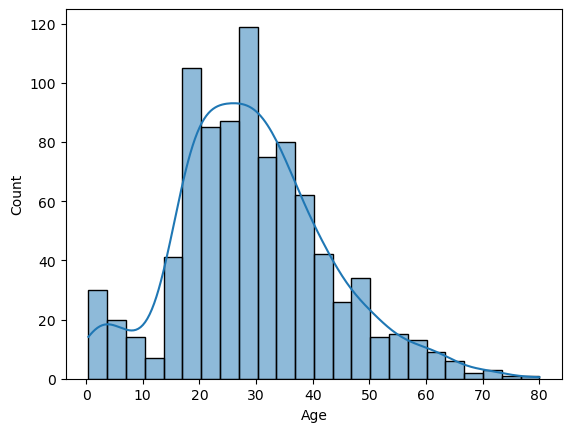

In [415]:
sns.histplot(train['Age'],kde=True)

<Axes: >

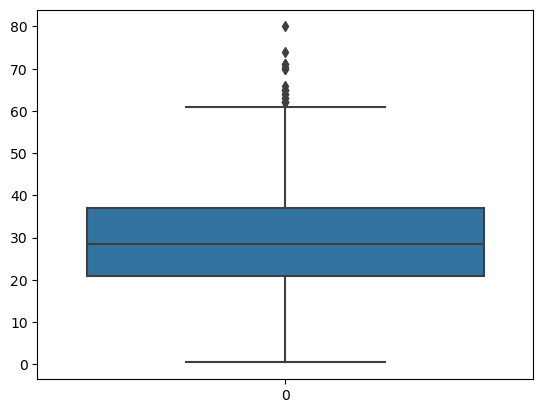

In [416]:
sns.boxplot(train['Age'])

In [419]:
train[train['Age']>75]['Survived'].value_counts()

Survived
1    1
Name: count, dtype: int64

C:\Users\Krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

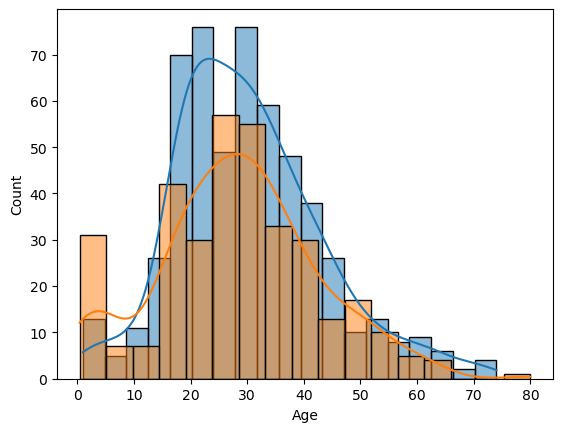

In [421]:

sns.histplot(train[train['Survived']==0]['Age'],kde=True)
sns.histplot(train[train['Survived']==1]['Age'],kde=True)

In [422]:
passengerId=test['PassengerId'].values

In [424]:
train.drop(columns=['PassengerId','Ticket','Name'],inplace=True)
test.drop(columns=['PassengerId','Ticket','Name'],inplace=True)

In [425]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [426]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [427]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [429]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [430]:
def family(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [432]:
train['family_size']=train['family'].apply(family)

In [434]:
test['family_size']=test['family'].apply(family)

In [436]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [437]:
train=pd.get_dummies(train, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)

In [438]:
test=pd.get_dummies(test, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)

In [439]:
train.shape

(891, 9)

In [440]:
test.shape

(418, 8)

In [444]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [450]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [462]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [464]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [467]:
y_pred=clf.predict(X_test)

In [469]:
y_pred.shape

(179,)

In [471]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8044692737430168

In [473]:
xf=test.iloc[:,:].values

In [475]:
yf=clf.predict(xf)

In [477]:
final=pd.DataFrame()

In [479]:
final['PassengerId']=passengerId
final['Survived']=yf

In [481]:
final.to_csv('submission.csv', index=False)